# Assignment 3

As before, if a question can be answered with 'yes/no', or a numeric value, you may simply state as much. If you incorporate code from the internet (which is not required and generally not advisable), please cite the source within your code (providing a URL is sufficient).

We will go through comparable code and concepts in the live learning session. If you run into trouble, start by using the help `help()` function in Python, to get information about the datasets and function in question. The internet is also a great resource when coding (though note that no outside searches are required by the assignment!). If you do incorporate code from the internet, please cite the source within your code (providing a URL is sufficient).

Please bring questions that you cannot work out on your own to office hours, work periods or share with your peers on Slack. We will work with you through the issue.

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import statsmodels.api as sm

### Question 1: Resampling via Bootstrapping

Now, we'll use the `iris` dataset, which we will add to Python using the `statsmodels` library. As always, start by reviewing a description of the dataset, by printing the dataset.

In [3]:
# Import
iris = sm.datasets.get_rdataset('iris', 'datasets')
df = pd.DataFrame(iris.data)
print(df)

     Sepal.Length  Sepal.Width  Petal.Length  Petal.Width    Species
0             5.1          3.5           1.4          0.2     setosa
1             4.9          3.0           1.4          0.2     setosa
2             4.7          3.2           1.3          0.2     setosa
3             4.6          3.1           1.5          0.2     setosa
4             5.0          3.6           1.4          0.2     setosa
..            ...          ...           ...          ...        ...
145           6.7          3.0           5.2          2.3  virginica
146           6.3          2.5           5.0          1.9  virginica
147           6.5          3.0           5.2          2.0  virginica
148           6.2          3.4           5.4          2.3  virginica
149           5.9          3.0           5.1          1.8  virginica

[150 rows x 5 columns]


_(i)_ Create an `alpha_func(D, idx)` function which takes the `Sepal`'s `width` and `length` to calculate for alpha

In [4]:
# Your code h
def alpha_func(D, idx):
    sepal_length = D.loc[idx, 'Sepal.Length']
    sepal_width = D.loc[idx, 'Sepal.Width']
    
    alpha = sepal_length / sepal_width
    return alpha


Test the code below

In [5]:
alpha_func(df, range(100))

0     1.457143
1     1.633333
2     1.468750
3     1.483871
4     1.388889
        ...   
95    1.900000
96    1.965517
97    2.137931
98    2.040000
99    2.035714
Length: 100, dtype: float64

_(ii)_ Construct a new bootstrap data set and recompute alpha

In [6]:
rng = np.random.default_rng(0)
alpha_func(df,
           rng.choice(100,
                      100,
                      replace=True))

85    1.764706
63    2.103448
51    2.000000
26    1.470588
30    1.548387
        ...   
62    2.727273
4     1.388889
8     1.517241
37    1.361111
83    2.222222
Length: 100, dtype: float64

Imagine we are analysts working for a shipping company. The company wants to know the average length of iris' petals, to inform space allotment on an upcoming shipment. The relevant variable in the dataset is `Sepal.Length`. 

_(iii)_ Why is it (perhaps) not sufficient to simply calculate the mean of `Sepal.Length`? What more information will preforming a bootstrap provide to us?  

_(iv)_ We can perform bootstrapping in Python by defining a simple function using `boot_SE()` for computing the bootstrap standard error. Remember, because bootstrapping involves randomness, we must first set a seed for reproducibility!

III) By using bootstrapping, we gain insights into the variability and reliability of our mean estimate, which is crucial for making informed decisions. We can also use the bootstrap standard error to confirm reliability.


_(v)_ Evaluate the accuracy of our alpha estimate with B = 1000

In [7]:
def bootstrap_alpha(data, B=1000):
    np.random.seed(123)  
    alphas = []

    for _ in range(B):
        bootstrap_sample = data.sample(n=len(data), replace=True)
        sample_indices = bootstrap_sample.index
        alpha_values = [alpha_func(data, idx) for idx in sample_indices]
        alphas.append(np.mean(alpha_values))

    bootstrap_se_alpha = np.std(alphas)
    return bootstrap_se_alpha

print(bootstrap_alpha(df))

0.032879245601620435


_(vi)_ What is the original mean value of `Sepal.Length`?

In [8]:
mean_sepal_length=np.mean(df['Sepal.Length'])
mean_sepal_length



5.843333333333334

The mean length is 5.84333334

Next, let's create a new bootstrapping to bootstrap samples (`boot_se_samples`) of `Sepal.Length`, in order to compute its bootstrapped mean and standard deviation.

_(vii)_. Write code to review the bootstrapped mean value, and the standard deviation of the bootstrapped samples. Compare the mean against its original value. Then, review the bootstrapped range, by using `t_range = np.ptp(boot_se_samples)`.

In [15]:
def bootstrap_sepal_length(data, B=1000):
    np.random.seed(1234)  
    boot_se_samples = []

    for _ in range(B):
        bootstrap_sample = np.random.choice(data, size=len(data), replace=True)
        boot_se_samples.append(np.mean(bootstrap_sample))

    boot_se_mean = np.mean(boot_se_samples)
    boot_se_std = np.std(boot_se_samples)
    t_range = np.ptp(boot_se_samples) 

    return boot_se_samples, boot_se_mean, boot_se_std, t_range


sepal_length_data = df['Sepal.Length']
original_mean = np.mean(sepal_length_data)
bootstrapped_se_samples, bootstrapped_se_mean, bootstrapped_se_std, t_range = bootstrap_sepal_length(sepal_length_data)

_(viii)_ Next, let's compute 95% confidence intervals, for the mean value of iris sepal length. (Hint: use the `np.percentile` function)

In [16]:
np.percentile(bootstrapped_se_samples, [2.5, 97.5])

array([5.70663333, 5.98805   ])

_(ix)_. Use the plot function to create an histogram of the bootstrapped samples. What does this histogram show ?

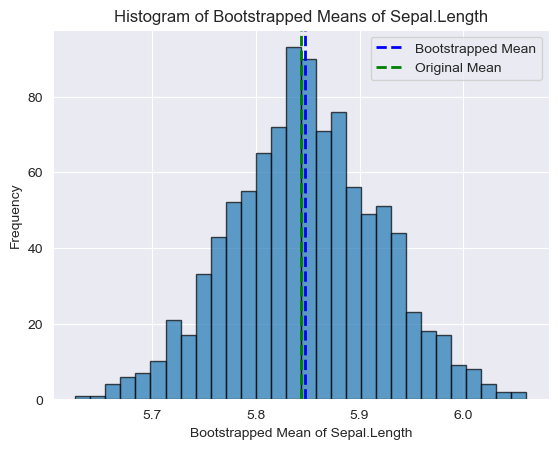

In [18]:
#Complete this

# Create a figure and axis
fig, ax = plt.subplots()

plt.hist(bootstrapped_se_samples, bins=30, edgecolor='k', alpha=0.7)
plt.axvline(bootstrapped_se_mean, color='b', linestyle='dashed', linewidth=2, label='Bootstrapped Mean')
plt.axvline(original_mean, color='g', linestyle='dashed', linewidth=2, label='Original Mean')
plt.xlabel('Bootstrapped Mean of Sepal.Length')
plt.ylabel('Frequency')
plt.title('Histogram of Bootstrapped Means of Sepal.Length')
plt.legend()
plt.show()
# Show the plot
plt.show()

_(x)_ Given your bootstrapped analysis, what do you recommend to shipping company? 

Since the observed mean and the bootstrapped mean are very close.The chosen data is consistent with 95% confidence intervals.
The current batch has flowers that are fairly consistent.

# Criteria

|Criteria            |Complete           |Incomplete          |
|--------------------|---------------|--------------|
|Bootstrapping|All steps are done correctly and the answers are correct.|At least one step is done incorrectly leading to a wrong answer.|

## Submission Information

🚨 **Please review our [Assignment Submission Guide](https://github.com/UofT-DSI/onboarding/blob/main/onboarding_documents/submissions.md)** 🚨 for detailed instructions on how to format, branch, and submit your work. Following these guidelines is crucial for your submissions to be evaluated correctly.

### Note:

If you like, you may collaborate with others in the cohort. If you choose to do so, please indicate with whom you have worked with in your pull request by tagging their GitHub username. Separate submissions are required.


### Submission Parameters:
* Submission Due Date: `HH:MM AM/PM - DD/MM/YYYY`
* The branch name for your repo should be: `assignment-3`
* What to submit for this assignment:
    * This Jupyter Notebook (assignment_3.ipynb) should be populated and should be the only change in your pull request.
* What the pull request link should look like for this assignment: `https://github.com/<your_github_username>/applying_statistical_concepts/pull/<pr_id>`
    * Open a private window in your browser. Copy and paste the link to your pull request into the address bar. Make sure you can see your pull request properly. This helps the technical facilitator and learning support staff review your submission easily.

Checklist:
- [ ] Created a branch with the correct naming convention.
- [ ] Ensured that the repository is public.
- [ ] Reviewed the PR description guidelines and adhered to them.
- [ ] Verify that the link is accessible in a private browser window.

If you encounter any difficulties or have questions, please don't hesitate to reach out to our team via our Slack at `#cohort-3-help`. Our Technical Facilitators and Learning Support staff are here to help you navigate any challenges.
